train:  (965165, 12)
label:  (965165,)


In [1]:
import numpy as np
from src import config
from src import MyUtil as myUtil
print('done import')


done import


In [2]:
recordNames = config.NAME_OF_RECORD
numRecord = len(recordNames)
numTrain = config.NUMBER_OF_TRAIN_RECORD
trainRqa = []
trainLabel = []

# for iRecord in range(0, numTrain):
for iRecord in range(10, numRecord):
    rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'train')
    trainRqa = np.append(trainRqa, rqa, axis=0) if len(trainRqa) > 0 else rqa
    trainLabel = np.append(trainLabel, label, axis=0) if len(trainLabel) > 0 else label

testRqa = []
testLabel = []
for iRecord in range(0, 10):
    rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'test')
    testRqa = np.append(testRqa, rqa, axis=0) if len(testRqa) > 0 else rqa
    testLabel = np.append(testLabel, label, axis=0) if len(testLabel) > 0 else label
print('done load data')



done load data


In [8]:
# allRqa = []
# allLabel = []
# 
# # for iRecord in range(0, numTrain):
# for iRecord in range(10, numRecord):
#     rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'train')
#     allRqa = np.append(trainRqa, rqa, axis=0) if len(trainRqa) > 0 else rqa
#     allLabel = np.append(trainLabel, label, axis=0) if len(trainLabel) > 0 else label
# print('done load')
# X_embedded = np.load('backup.npy', allow_pickle=True)

# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2).fit_transform(allRqa)
# print(X_embedded.shape)
# np.save('backup2.npy', X_embedded)
# print('done transform')



done load
(15915, 2)
done transform


1
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
---------------


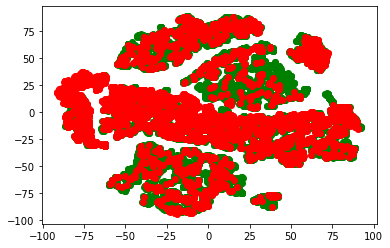

In [10]:
# print(X_embedded)
# import numpy as np
# import matplotlib.pyplot as plt
# # print(transform[:, 0])
# 
# # X_embedded = np.load('backup.npy', allow_pickle=True)
# print('1')
# normalX = X_embedded[np.where(allLabel == config.NORMAL_LABEL)]
# print(allLabel)
# normalIndex = np.where(allLabel == config.NORMAL_LABEL)
# print(allLabel[np.where(allLabel == config.NORMAL_LABEL)])
# print('---------------')
# apneaX = X_embedded[np.where(allLabel == config.APNEA_LABEL)]
# apneaIndex = np.where(allLabel == config.APNEA_LABEL)
# 
# plt.scatter(normalX[:, 0], normalX[: ,1], color='green')
# plt.scatter(apneaX[:, 0], apneaX[: ,1], color='red')
# plt.show()

In [3]:
print('trainRqa: ', trainRqa.shape)
# print(trainRqa[-10:])
print('trainLabel: ', trainLabel.shape)
print('testRqa: ', testRqa.shape)
# print(testRqa[-10:])
print('testLabel: ', testLabel.shape)

unique, count = np.unique(trainLabel, return_counts=True)
print('trainLabel unique: ', dict(zip(unique, count)))
unique, count = np.unique(testLabel, return_counts=True)
print('testLabel unique: ', dict(zip(unique, count)))#%%





trainRqa:  (14801, 9)
trainLabel:  (14801,)
testRqa:  (3198, 9)
testLabel:  (3198,)
trainLabel unique:  {0: 10608, 1: 4193}
testLabel unique:  {0: 1512, 1: 1686}


In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 30, 2), max_iter=500, alpha=0.0001,
                    solver='adam', random_state=1, validation_fraction=0.1, early_stopping=True)

print(clf)
clf.fit(trainRqa, trainLabel)
print('done')

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(60, 30, 2), max_iter=500, random_state=1)
done


In [ ]:
from sklearn.model_selection import GridSearchCV

# parramGrid = {
#     'activation': ['tanh', '']
# }

In [5]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

pre = clf.predict(testRqa)
# print('pre: ', pre)
test = accuracy_score(testLabel, pre)
print(test)

print('recall: ', recall_score(testLabel, pre))
print('percision: ', precision_score(testLabel, pre))
print('confusion_matrix: \n', confusion_matrix(testLabel, pre))
print('done Test')


0.707004377736085
recall:  0.5213523131672598
percision:  0.8711595639246779
confusion_matrix: 
 [[1382  130]
 [ 807  879]]
done Test


In [6]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix


for start in range(0, 10):
    print(start, '--------------------------------------')
    testRqa = []
    testLabel = []
    for iRecord in range(start, start+1):
        rqa, label, _ = myUtil.loadRqa(recordNames[iRecord], 'test')
        testRqa = np.append(testRqa, rqa, axis=0) if len(testRqa) > 0 else rqa
        testLabel = np.append(testLabel, label, axis=0) if len(testLabel) > 0 else label
    unique, count = np.unique(testLabel, return_counts=True)
    print('testLabel unique: ', dict(zip(unique, count)))
    print('done load data')

    from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

    pre = clf.predict(testRqa)
    # print('pre: ', pre)
    test = accuracy_score(testLabel, pre)
    print(test)

    print('recall: ', recall_score(testLabel, pre))
    print('percision: ', precision_score(testLabel, pre))
    print('confusion_matrix: \n', confusion_matrix(testLabel, pre))
    print('done Test')


0 --------------------------------------
testLabel unique:  {1: 13}
done load data
0.8461538461538461
recall:  0.8461538461538461
percision:  1.0
confusion_matrix: 
 [[ 0  0]
 [ 2 11]]
done Test
1 --------------------------------------
testLabel unique:  {0: 70, 1: 161}
done load data
0.5324675324675324
recall:  0.34782608695652173
percision:  0.9491525423728814
confusion_matrix: 
 [[ 67   3]
 [105  56]]
done Test
2 --------------------------------------
testLabel unique:  {0: 266, 1: 245}
done load data
0.8590998043052838
recall:  0.8081632653061225
percision:  0.8878923766816144
confusion_matrix: 
 [[241  25]
 [ 47 198]]
done Test
3 --------------------------------------
testLabel unique:  {1: 4}
done load data
1.0
recall:  1.0
percision:  1.0
confusion_matrix: 
 [[4]]
done Test
4 --------------------------------------
testLabel unique:  {0: 162, 1: 276}
done load data
0.8242009132420092
recall:  0.7318840579710145
percision:  0.9853658536585366
confusion_matrix: 
 [[159   3]
 [ 74 2

d:\python\testpycharm\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\python\testpycharm\venv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
